## Regression Project - Uber/Life Prices

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing in the dataset
cab = pd.read_csv('Data/cab.csv')

#Cleaning out the df
df = cab.drop(columns = ['id', 'product_id', 'source'])

#Shuffling df
df = df.sample(frac=1).reset_index(drop=True)

#Splitting df and strictly selecting 20000 rows
df = df.iloc[0: 20000]
df = df.dropna()
df = df.reset_index()

In [3]:
#Establishing the categorical variables into quantitative values
one_hot = pd.get_dummies(df['destination'])
df = df.drop('destination', axis = 1)

one_hot2 = pd.get_dummies(df['name'])
df = df.drop('name', axis = 1)

one_hot3 = pd.get_dummies(df['cab_type'])
df = df.drop('cab_type', axis = 1)

one_hot = one_hot.join(one_hot2)
one_hot.rename(columns = {'Lyft': 'Lyft_Standard'}, inplace = True)
one_hot = one_hot.join(one_hot3)

In [4]:
#Determining Coorelation
df.corr()['price'].sort_values(ascending=False)

price               1.000000
distance            0.343305
surge_multiplier    0.257136
time_stamp          0.023153
index               0.008132
Name: price, dtype: float64

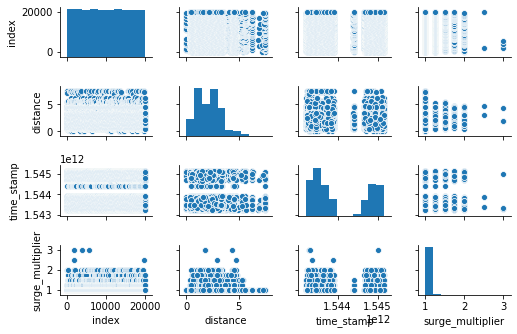

In [5]:
#Producing a sns
sns.pairplot(df.drop('price', axis = 1), height = 1.2, aspect=1.5)

In [6]:
#Response Variable
y = df['price']

#Numerical Values
df = df.drop(columns = ['price', 'index'])

[87.49932987318304, 71.77240034930065, 71.77230571095645, 71.7722173636764, 71.77213531125207, 71.77205955745366, 71.77199010602965, 71.77192696070708, 71.77187012519126, 71.77181960316587, 71.77177539829289, 71.7717375142125, 71.77170595454312, 71.77168072288134, 71.77166182280183, 71.77164925785736, 71.77164303157873] [85.1616128763683, 69.6721964392677, 69.67154930157346, 69.67090819304683, 69.67027311965396, 69.66964408654349, 69.66902109884485, 69.66840416166745, 69.66779328010172, 69.66718845914883, 69.6665897040685, 69.6659970196835, 69.66541041107521, 69.66482988323563, 69.66425544113693, 69.66368708973147, 69.66312483430062]


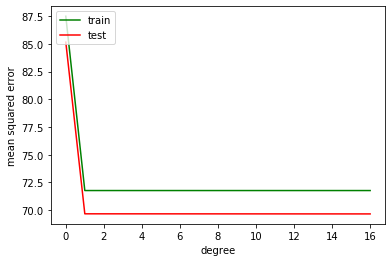

In [7]:
#Determining what transformation to do to the X variables
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state = 99)

mindegree = 0
maxdegree = 17

train_error = []
test_error = []

for deg in range(mindegree, maxdegree):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression())
    model.fit(X_train,y_train)
    train_error.append(mean_squared_error(y_train,model.predict(X_train)))
    test_error.append(mean_squared_error(y_test,model.predict(X_test)))

print(train_error,test_error)
plt.plot(np.arange(mindegree,maxdegree), train_error, color='green', label='train')
plt.plot(np.arange(mindegree,maxdegree), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [8]:
# Applying Standard Scaler to numerical values
model = make_pipeline(PolynomialFeatures(1), StandardScaler())
model.fit(df)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [9]:
#Joining the onehots into the og dataset
x = one_hot.join(pd.DataFrame(model.transform(df)))

In [10]:
#Applying a regression to the data without testing or training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9297381986362303


In [11]:
model.predict([x.iloc[0]])

array([9.22265625])

In [12]:
print(model.coef_)
print(model.intercept_)

[-6.49032715e+11 -6.49032715e+11 -6.49032715e+11 -6.49032715e+11
 -6.49032715e+11 -6.49032715e+11 -6.49032715e+11 -6.49032715e+11
 -6.49032715e+11 -6.49032715e+11 -6.49032715e+11 -6.49032715e+11
 -9.91593250e+11 -9.91593250e+11 -4.24975389e+11 -4.24975389e+11
 -4.24975389e+11 -4.24975389e+11 -4.24975389e+11 -4.24975389e+11
 -9.91593250e+11 -9.91593250e+11 -9.91593250e+11 -9.91593250e+11
 -2.83308931e+11  2.83308931e+11  0.00000000e+00  3.13770783e+00
  2.67243370e-02  1.86291717e+00]
1357317035153.4805


In [13]:
#Applying ridge regression model
model1 = RidgeCV(alphas=[0.0001, 0.1, 1, 10], store_cv_values= True)
model1.fit(x, y)

print('R2:', model1.score(x, y))
print('alpha: ', model1.alpha_)
print(f'MSE corresponding to best alpha {model1.alpha_}: {np.mean(model1.cv_values_, axis = 0)[0]}')

model1.predict([x.iloc[0]])

R2: 0.9270404032124527
alpha:  0.0001
MSE corresponding to best alpha 0.0001: 6.361199502500465


array([9.26456785])

In [14]:
print(model1.coef_)
print(model1.intercept_)

[ -0.07415006  -0.28942753   0.20731314  -0.28986462   0.29159923
   0.02229288  -0.06450106   0.18621449   0.14080613  -0.19330098
   0.15107674  -0.08805835   4.76221951  14.37288662   0.34970654
   5.65965514  14.95769932  -7.8048389   -2.11180531 -10.64189758
  -7.04543406  -6.14190076  -0.22617512  -6.1301154    0.4085192
  -0.4085192    0.           3.14418451   0.02546129   1.87016434]
16.56191036700534
